<a href="https://colab.research.google.com/github/hjangir080/Wine_Dataset_Analysis/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Load dataset
file_path = "/content/winequality-red.csv"
data = pd.read_csv(file_path, delimiter=";")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<ipython-input-72-8ab182b39792>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')


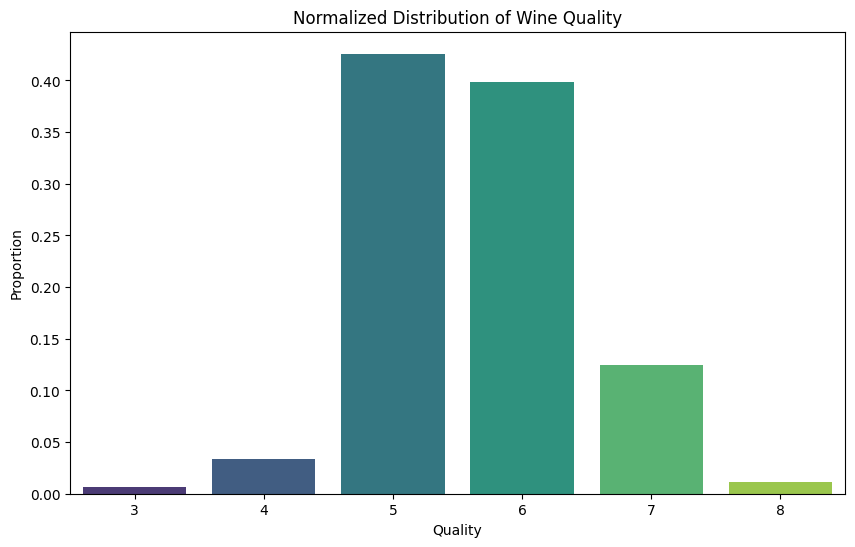

In [ ]:
plt.figure(figsize=(10, 6))
quality_counts = data['quality'].value_counts(normalize=True).sort_index()
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')
plt.title('Normalized Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Proportion')
plt.show()

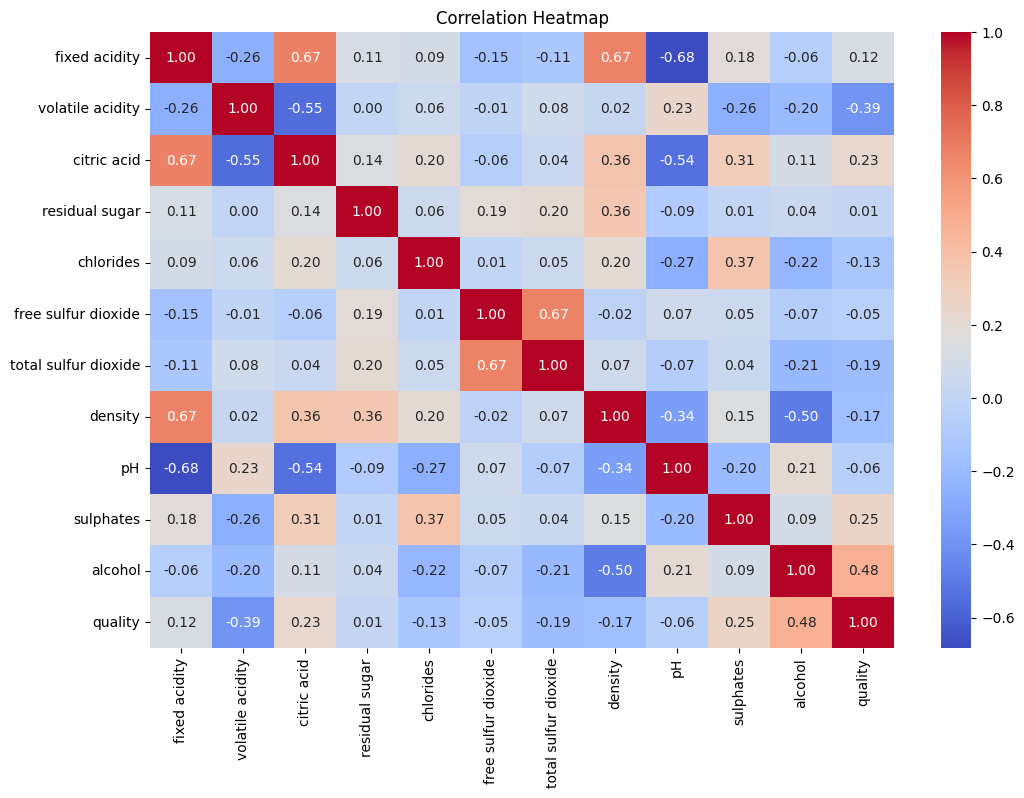

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

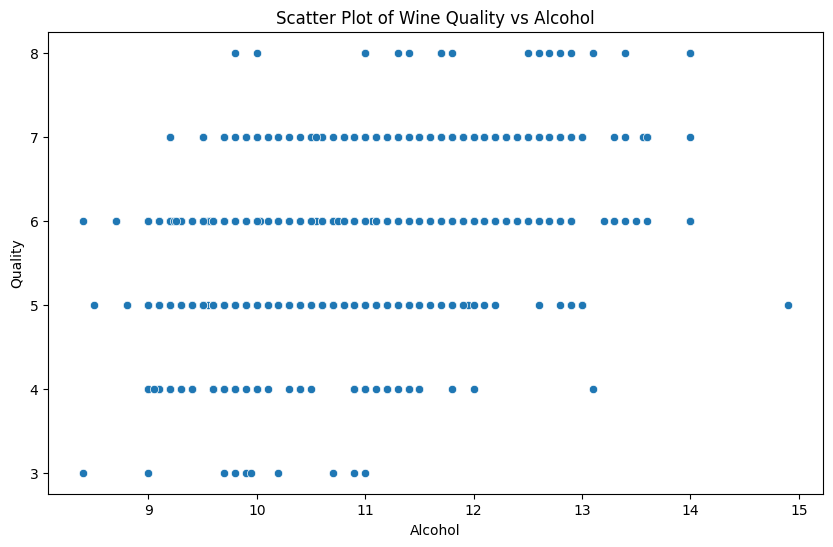

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Scatter Plot of Wine Quality vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

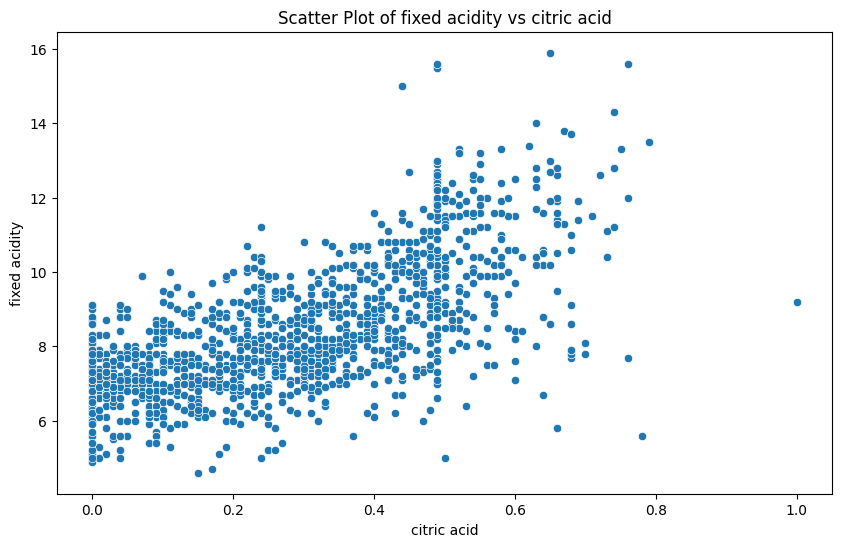

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='citric acid', y='fixed acidity', data=data)
plt.title('Scatter Plot of fixed acidity vs citric acid')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.show()

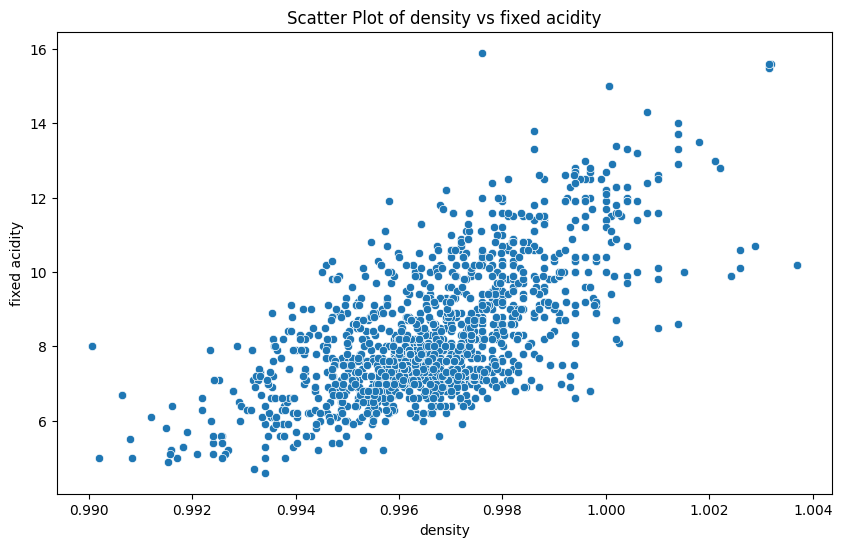

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='fixed acidity', data=data)
plt.title('Scatter Plot of density vs fixed acidity')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.show()

In [ ]:
# Linear Regression
x = data[['alcohol']]
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

Linear Regression Mean Squared Error: 0.5444843126455529


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


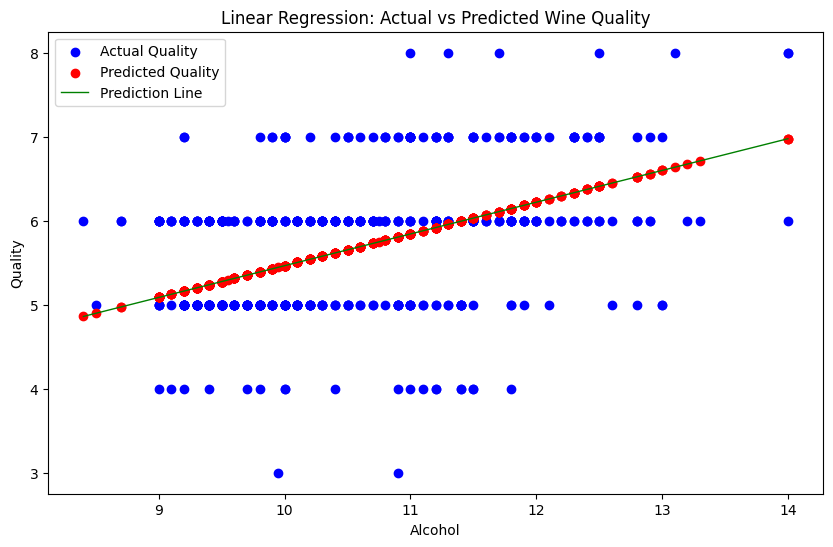

In [ ]:
# Plotting Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Quality')
plt.scatter(x_test, y_pred, color='red', label='Predicted Quality')

x_line = np.linspace(x_test.min(), x_test.max(), 100)
y_line = model_lr.predict(x_line)
plt.plot(x_line, y_line, color='green', linewidth=1, label='Prediction Line')

plt.title('Linear Regression: Actual vs Predicted Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [ ]:
# Linear Regression
x = data[['density']]
y = data['fixed acidity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

Linear Regression Mean Squared Error: 1.7115472836829455


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


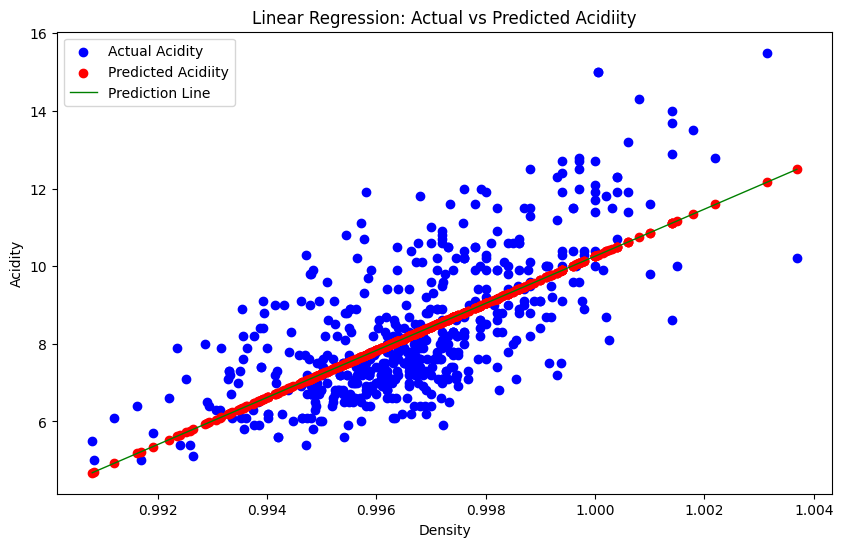

In [ ]:
# Plotting Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Acidity')
plt.scatter(x_test, y_pred, color='red', label='Predicted Acidiity')

x_line = np.linspace(x_test.min(), x_test.max(), 100)
y_line = model_lr.predict(x_line)
plt.plot(x_line, y_line, color='green', linewidth=1, label='Prediction Line')

plt.title('Linear Regression: Actual vs Predicted Acidiity')
plt.xlabel('Density')
plt.ylabel('Acidity')
plt.legend()
plt.show()

Multi-Linear Regression Mean Squared Error: 0.42420408998018405


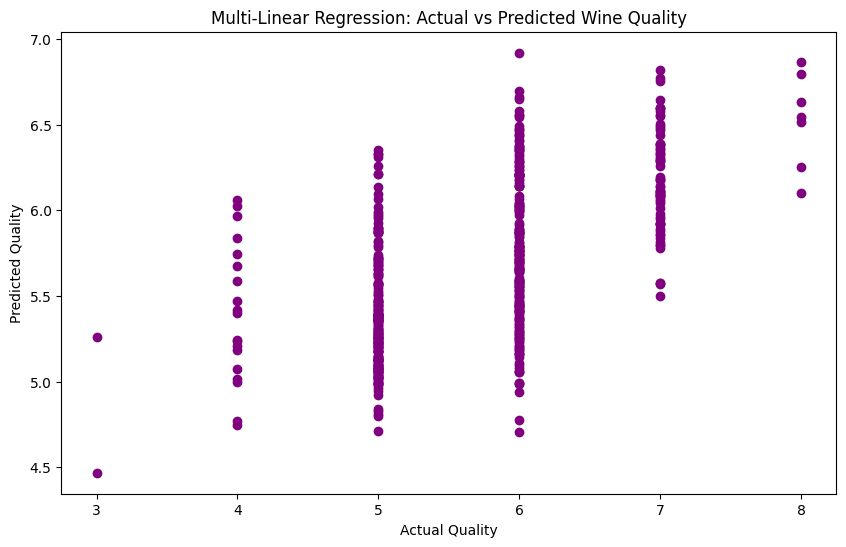

In [ ]:
X_multi = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.33, random_state=42)

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred = model_mlr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Multi-Linear Regression Mean Squared Error: {mse}")

# Plotting Multi-Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.title('Multi-Linear Regression: Actual vs Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()


Multi-Linear Regression Mean Squared Error: 0.37887018835371955


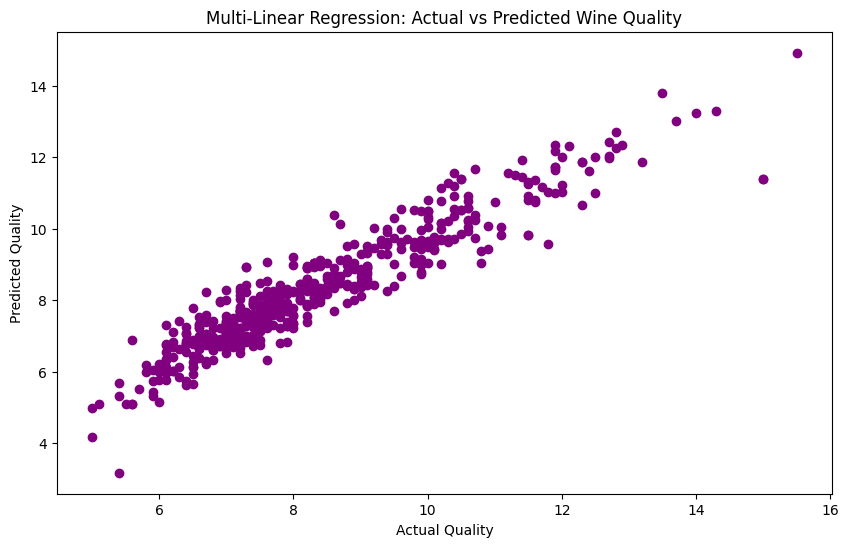

In [ ]:
X_multi = data.drop('fixed acidity', axis=1)
y = data['fixed acidity']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.33, random_state=42)

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred = model_mlr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Multi-Linear Regression Mean Squared Error: {mse}")

# Plotting Multi-Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.title('Multi-Linear Regression: Actual vs Predicted Wine acidity')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()


In [ ]:
# Logistic Regression
data['quality_label'] = data['quality'].apply(lambda x: 1 if x > 6 else 0)
X_log = data.drop(['quality', 'quality_label'], axis=1)
y_log = data['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.33, random_state=42)

model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8617424242424242


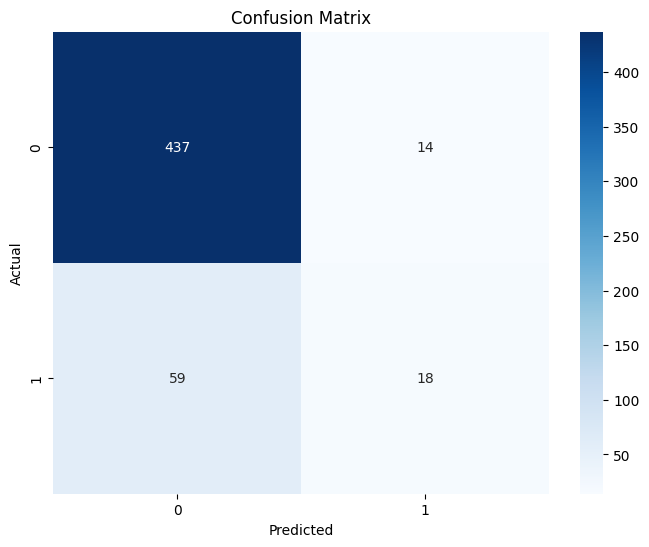

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       451
           1       0.56      0.23      0.33        77

    accuracy                           0.86       528
   macro avg       0.72      0.60      0.63       528
weighted avg       0.83      0.86      0.84       528



In [ ]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Classification Report:\n', class_report)